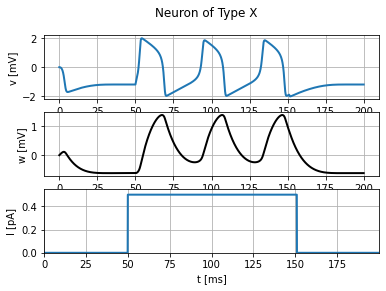

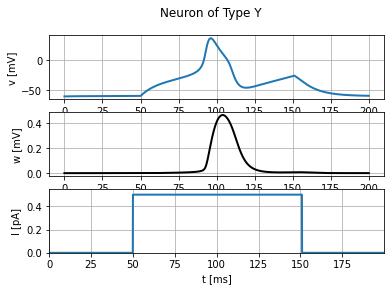

In [23]:
# %matplotlib inline  # needed in Notebooks, not in Python scripts
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons

# create an input current
input_current = input_factory.get_step_current(50, 150, 1.*b2.ms, 0.5*b2.pA)

# neurons.neurontype_random_reassignment()

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 200*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(input_current, 200*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

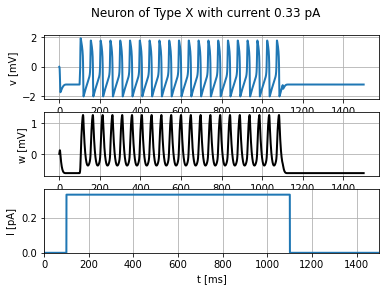

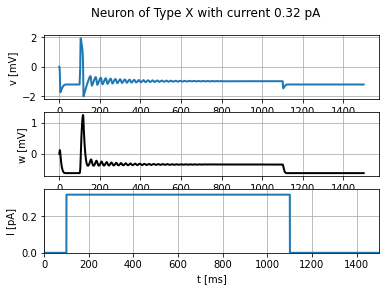

In [24]:
I_amp = 0.33
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_amp*b2.pA)
state_monitor = a_neuron_of_type_X.run(input_current, 1500*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type X with current {} pA".format(I_amp))
I_amp = 0.32
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_amp*b2.pA)
state_monitor = a_neuron_of_type_X.run(input_current, 1500*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type X with current {} pA".format(I_amp))

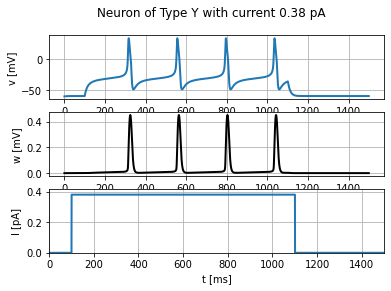

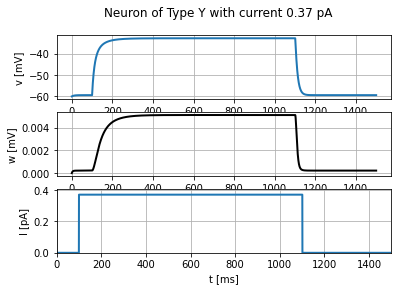

In [25]:
I_amp = 0.38
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_amp*b2.pA)
state_monitor = a_neuron_of_type_Y.run(input_current, 1500*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y with current {} pA".format(I_amp))
I_amp = 0.37
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_amp*b2.pA)
state_monitor = a_neuron_of_type_Y.run(input_current, 1500*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y with current {} pA".format(I_amp))


In [30]:
input_current = input_factory.get_step_current(100, 1100, b2.ms, 0.5*b2.pA)

def get_firing_rate(neuron, input_current, spike_threshold):
    state_monitor = neuron.run(input_current, 1500*b2.ms)
    spike_times = spike_tools.get_spike_time(state_monitor, spike_threshold)
    # neurons.plot_data(state_monitor)
    isi = spike_times[1:] - spike_times[:-1]
    f = 1/np.mean(isi) if len(isi) != 0 else 0.*b2.Hz
    return f

get_firing_rate(a_neuron_of_type_X, input_current, 0*b2.mV)

25.28317152 * hertz

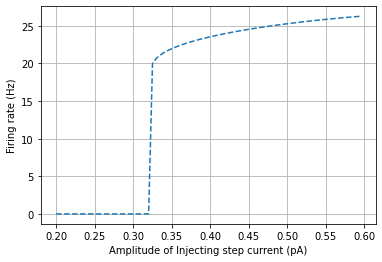

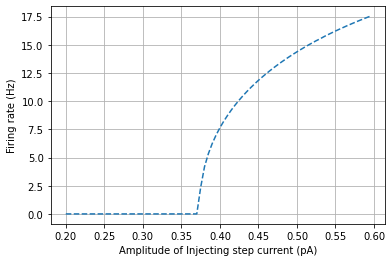

In [33]:
def plot_fI_curve(NeuronClass):

    plt.figure()  # new figure

    neuron = NeuronClass()  # instantiate the neuron class

    I = np.arange(0.2,0.6,0.005)  # a range of current inputs
    f = []

    # loop over current values
    for I_amp in I:
        input_current = input_factory.get_step_current(1000, 11000, 0.1*b2.ms, I_amp*b2.pA)
        firing_rate = get_firing_rate(neuron, input_current, 0*b2.mV)
        f.append(firing_rate)

    plt.plot(I, f, linestyle='--')
    plt.xlabel('Amplitude of Injecting step current (pA)')
    plt.ylabel('Firing rate (Hz)')
    plt.grid()
    plt.show()


plot_fI_curve(neurons.NeuronX)
plot_fI_curve(neurons.NeuronY)